In [45]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [46]:
df_unweighted = pd.read_csv('combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [47]:
df_weighted = pd.read_csv('combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [48]:
df_weighted_jur = df_weighted[df_weighted['status'] == 'jurisdiction']
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
0,Hong Kong,Samoa
1,Hong Kong,Samoa
2,Hong Kong,Samoa
3,Hong Kong,Samoa
4,Hong Kong,Samoa
...,...,...
216554,British Virgin Islands,Cook Islands
216555,British Virgin Islands,Cook Islands
216556,British Virgin Islands,Cook Islands
216557,British Virgin Islands,Cook Islands


In [49]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1212,Vietnam,Panama,1
1213,Yemen,Panama,1
1214,Zambia,British Virgin Islands,2
1215,Zimbabwe,British Virgin Islands,5


### Convert Data to an Undirected Edge List

In [50]:
df_jur_grouped_list = df_jur_grouped.values.tolist()
df_jur_grouped_list

[['Albania', 'Bahamas', 2],
 ['Andorra', 'Bahamas', 26],
 ['Andorra', 'British Virgin Islands', 39],
 ['Andorra', 'Cayman Islands', 1],
 ['Andorra', 'Costa Rica', 3],
 ['Andorra', 'Hong Kong', 9],
 ['Andorra', 'Nevada', 24],
 ['Andorra', 'Niue', 12],
 ['Andorra', 'Panama', 279],
 ['Andorra', 'Samoa', 9],
 ['Andorra', 'Seychelles', 72],
 ['Andorra', 'United Kingdom', 1],
 ['Andorra', 'Uruguay', 15],
 ['Angola', 'Bermuda', 1],
 ['Angola', 'British Virgin Islands', 11],
 ['Antigua and Barbuda', 'Barbados', 8],
 ['Antigua and Barbuda', 'British Virgin Islands', 1],
 ['Antigua and Barbuda', 'Cayman Islands', 1],
 ['Antigua and Barbuda', 'Niue', 2],
 ['Antigua and Barbuda', 'Panama', 15],
 ['Antigua and Barbuda', 'Saint Kitts and Nevis', 1],
 ['Antigua and Barbuda', 'Seychelles', 3],
 ['Argentina', 'Bahamas', 23],
 ['Argentina', 'Barbados', 1],
 ['Argentina', 'British Virgin Islands', 83],
 ['Argentina', 'Cayman Islands', 3],
 ['Argentina', 'Costa Rica', 1],
 ['Argentina', 'Hong Kong', 4],
 

In [51]:
d = collections.defaultdict(int)
for n1, n2, v in df_jur_grouped_list:
    d[min(n1, n2), max(n1, n2)] += v
result = [[k[0], k[1], v] for k, v in d.items()]

In [52]:
df_net = pd.DataFrame(result)
df_net

,0,1,2
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1125,Panama,Vietnam,1
1126,Panama,Yemen,1
1127,British Virgin Islands,Zambia,2
1128,British Virgin Islands,Zimbabwe,5


In [53]:
df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
df_net

,node_1,node_2,weight
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1125,Panama,Vietnam,1
1126,Panama,Yemen,1
1127,British Virgin Islands,Zambia,2
1128,British Virgin Islands,Zimbabwe,5


In [54]:
#import df_net to csv later

In [55]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_net.itertuples(index=False), directed=False, edge_attrs={'weight': "weight"})


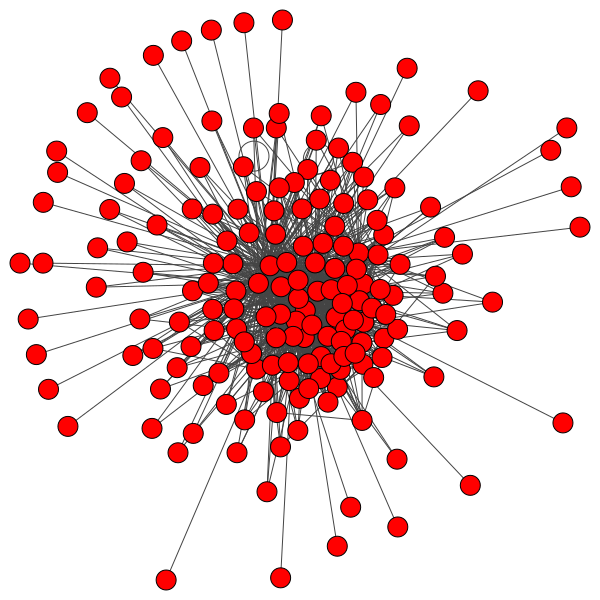

In [56]:
ig.plot(g)

In [57]:
g.diameter()

4

In [58]:
len(g.vs.indices)

174

In [59]:
#g.vs.indices
df_net['node_1'].value_counts()

British Virgin Islands    125
Bahamas                    93
Cayman Islands             73
Bermuda                    69
Barbados                   68
                         ... 
Croatia                     1
Libya                       1
Lesotho                     1
Namibia                     1
Spain                       1
Name: node_1, Length: 123, dtype: int64

In [60]:
uni =df_net['node_1'].unique()

In [61]:
len(uni)

123

In [62]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 2, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 4, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 5, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 6, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 7, {'name': 'Nevada'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 8, {'name': 'Niue'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 9, {'name': 'Panama'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 10, {'name': 'Samoa'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff58b5c70>, 11, {'name': 'Seychelles'}),
 ig

In [63]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [64]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [65]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,betweenness,prop_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,"[0.0, 1114.3028644092146, 0.25059956778410286,...",0.01,4.0,-0.581407,13.052023,0.075012,2.039118
1,2,"[0.0, 1094.154178499884, 0.25603354978354975, ...",0.01,4.0,-0.580282,13.034884,0.075346,2.039712
2,3,"[0.0, 1053.5842882866123, 0.25603354978354975,...",0.02,4.0,-0.586211,12.994152,0.075547,2.038596
3,4,"[0.0, 1017.7509549532788, 0.25603354978354975,...",0.02,4.0,-0.585468,13.023529,0.076161,2.038218
4,5,"[0.0, 990.4438791788119, 0.25603354978354975, ...",0.03,4.0,-0.585302,13.041420,0.076714,2.038109


In [66]:
df_type1_unweighted.tail()

,nodes_removed,betweenness,prop_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
169,170,"[0.0, 0.0, 0.0, 0.0]",0.87,0.0,NaN,0.0,0.0,NaN
170,171,"[0.0, 0.0, 0.0]",0.87,0.0,NaN,0.0,0.0,NaN
171,172,"[0.0, 0.0]",0.88,0.0,NaN,0.0,0.0,NaN
172,173,[0.0],0.88,0.0,NaN,0.0,0.0,NaN
173,174,[],0.89,NaN,NaN,0.0,NaN,NaN


In [67]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,betweenness,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,14.0,"[0.0, 949.6626019806824, 16.991116405411724, 2...",-0.580436,12.901734,0.074148,2.042613
1,2,0.01,14.0,"[0.0, 971.2150330835307, 17.815218835904084, 2...",-0.578656,12.848837,0.074271,2.043656
2,3,0.02,14.0,"[0.0, 965.9662002170508, 2501.6448159411393, 1...",-0.578963,12.783626,0.074323,2.044444
3,4,0.02,14.0,"[0.0, 960.2971525980033, 2484.973387369711, 16...",-0.578345,12.847059,0.075129,2.039262
4,5,0.03,14.0,"[0.0, 955.0185811694317, 2472.0210064173298, 1...",-0.578831,12.840237,0.075531,2.039659


In [68]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,betweenness,assortativity_degree,avg_indegree,density,average_path_len
159,160,0.82,391.0,"[6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1.0,0.571429,0.038095,1.6
160,161,0.82,391.0,"[6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1.0,0.615385,0.043956,1.6
161,162,0.83,391.0,"[6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1.0,0.666667,0.051282,1.6
162,163,0.83,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000000,0.000000,NaN
163,164,0.84,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000000,0.000000,NaN
164,165,0.84,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.000000,0.000000,NaN
165,166,0.85,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.000000,0.000000,NaN
166,167,0.85,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.000000,0.000000,NaN
167,168,0.86,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.000000,0.000000,NaN
168,169,0.86,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.000000,0.000000,NaN


### Targeted attack

In [69]:
##try sort by transitivity 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'transitivity':g.transitivity_local_undirected(mode='zero',weights='weight')})

In [70]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='transitivity',ascending=False)

In [71]:
temp_df.head(50)

,Node_indice,Nodes,transitivity
142,142,Saint Lucia,1.412403
60,60,US Virgin Islands,1.393939
173,173,Zimbabwe,1.000000
35,35,Belarus,1.000000
90,90,Haiti,1.000000
27,27,Azerbaijan,1.000000
85,85,Ghana,1.000000
82,82,French Guiana,1.000000
30,30,Netherlands Antilles,1.000000
80,80,Finland,1.000000


In [72]:
temp_df.tail(50)

,Node_indice,Nodes,transitivity
29,29,Malta,0.828768
101,101,Italy,0.812987
18,18,Saint Kitts and Nevis,0.805128
20,20,New Zealand,0.800858
31,31,Wyoming,0.786787
24,24,Cook Islands,0.731159
114,114,Macao,0.718310
10,10,Samoa,0.682229
17,17,Barbados,0.563446
4,4,Cayman Islands,0.535572


In [73]:
#extract out by Node
transitivity_of_del = temp_df['Nodes'].tolist()

In [74]:
#print the list to check it
transitivity_of_del

['Saint Lucia',
 'US Virgin Islands',
 'Zimbabwe',
 'Belarus',
 'Haiti',
 'Azerbaijan',
 'Ghana',
 'French Guiana',
 'Netherlands Antilles',
 'Finland',
 'Bahrain',
 'Bangladesh',
 'Cuba',
 'Dominica',
 'Iceland',
 'Croatia',
 'Chad',
 'Saint Vincent and the Grenadines',
 'Bolivia',
 'Botswana',
 'Marshall Islands',
 'State of Delaware',
 'Bulgaria',
 'Honduras',
 'Jamaica',
 'Syria',
 'Slovenia',
 'Senegal',
 'Puerto Rico',
 'Pakistan',
 'Oman',
 'Norway',
 'Nicaragua',
 'Mozambique',
 'Morocco',
 'Montenegro',
 'Angola',
 'Tanzania',
 'Trinidad and Tobago',
 'Macedonia',
 'Libya',
 'Tunisia',
 'Latvia',
 'Kazakhstan',
 'Jordan',
 'Turks and Caicos Islands',
 'Mauritius',
 'Czech Republic',
 'Dominican Republic',
 'Gibraltar',
 'Estonia',
 'South Africa',
 'Paraguay',
 'Ukraine',
 'Qatar',
 'Egypt',
 'Vietnam',
 'Turkey',
 'Argentina',
 'Kenya',
 'Germany',
 'Nigeria',
 'Russia',
 'Guatemala',
 'El Salvador',
 'Peru',
 'Costa Rica',
 'Uruguay',
 'Colombia',
 'Lebanon',
 'Belgium',
 'V

In [75]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [76]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [77]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,Saint Lucia,4.0,-0.583614,13.005780,0.074746,2.041471
1,2,0.01,US Virgin Islands,4.0,-0.584665,13.011628,0.075212,2.041684
2,3,0.02,Zimbabwe,4.0,-0.585722,13.064327,0.075955,2.041211
3,4,0.02,Belarus,4.0,-0.586661,13.105882,0.076643,2.040863
4,5,0.03,Haiti,4.0,-0.587457,13.159763,0.077410,2.039518


In [78]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
169,170,0.87,Namibia,0.0,NaN,0.0,0.0,NaN
170,171,0.87,Nauru,0.0,NaN,0.0,0.0,NaN
171,172,0.88,Saint Martin (French part),0.0,NaN,0.0,0.0,NaN
172,173,0.88,Sierra Leone,0.0,NaN,0.0,0.0,NaN
173,174,0.89,Guam,NaN,NaN,0.0,NaN,NaN


In [79]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,Saint Lucia,14.0,-0.583614,13.005780,0.074746,2.041471
1,2,0.01,US Virgin Islands,14.0,-0.584665,13.011628,0.075212,2.041684
2,3,0.02,Zimbabwe,14.0,-0.585722,13.064327,0.075955,2.041211
3,4,0.02,Belarus,14.0,-0.586661,13.105882,0.076643,2.040863
4,5,0.03,Haiti,14.0,-0.587457,13.159763,0.077410,2.039518
5,6,0.03,Azerbaijan,14.0,-0.588266,13.202381,0.078121,2.038566
6,7,0.04,Ghana,14.0,-0.588218,13.245509,0.078842,2.037587
7,8,0.04,French Guiana,14.0,-0.589387,13.289157,0.079576,2.036510
8,9,0.05,Netherlands Antilles,14.0,-0.588959,13.321212,0.080248,2.033777
9,10,0.05,Finland,14.0,-0.588144,13.329268,0.080783,2.033967


In [80]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
24,25,0.13,Jamaica,14.0,-0.593296,13.973154,0.093154,2.023490
25,26,0.13,Syria,14.0,-0.593188,14.040541,0.094232,2.021236
26,27,0.14,Slovenia,14.0,-0.593378,14.081633,0.095146,2.020781
27,28,0.14,Senegal,14.0,-0.593115,14.150685,0.096263,2.018706
28,29,0.15,Puerto Rico,14.0,-0.592725,14.220690,0.097402,2.016379
...,...,...,...,...,...,...,...,...
169,170,0.87,Namibia,0.0,NaN,0.000000,0.000000,NaN
170,171,0.87,Nauru,0.0,NaN,0.000000,0.000000,NaN
171,172,0.88,Saint Martin (French part),0.0,NaN,0.000000,0.000000,NaN
172,173,0.88,Sierra Leone,0.0,NaN,0.000000,0.000000,NaN


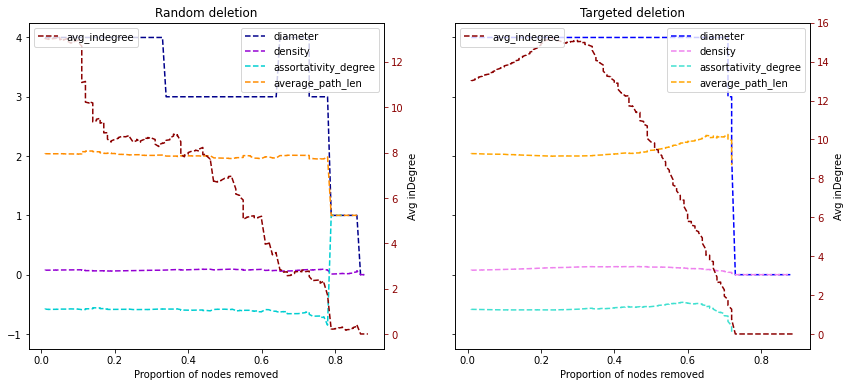

In [81]:
#Try plotting unweighted
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
ax2_1 = ax[0].twinx()
ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
ax2_1.plot('prop_removed','avg_indegree',data=df_type1_unweighted,ls='--',color='darkred')
ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Random deletion')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

ax2_2 = ax[1].twinx()
ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
ax2_2.plot('prop_removed','avg_indegree',data=df_type2_unweighted,ls='--',color='darkred')
ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Proportion of nodes removed')
ax[1].set_title('Targeted deletion')
ax2_2.tick_params('y',colors='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
plt.show()

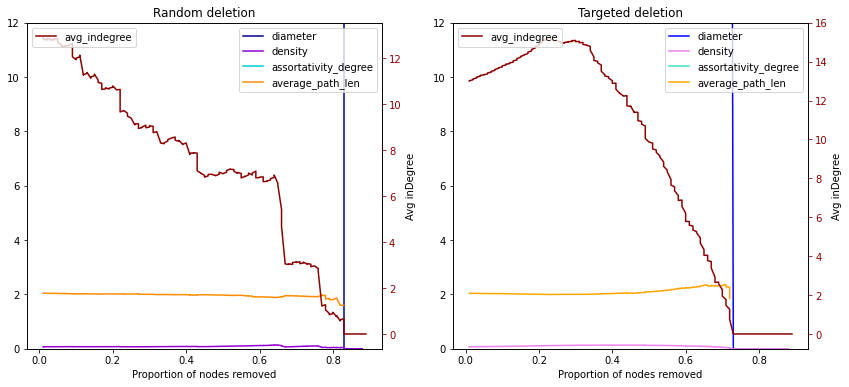

In [82]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=False)
ax2_1 = ax[0].twinx()
ax[0].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 4000 for diameter)
ax[0].set_ylim([0,12])
ax[0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax2_1.plot('prop_removed','avg_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax[0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Random deletion')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

ax2_2 = ax[1].twinx()
ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 600 for diameter)
ax[1].set_ylim([0,12])
ax[1].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax2_2.plot('prop_removed','avg_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax[1].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Proportion of nodes removed')
ax[1].set_title('Targeted deletion')
ax2_2.tick_params('y',colors='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
plt.show()